In [1]:
from __future__ import division

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
arange = np.arange
pi = np.pi
sin = np.sin
cos = np.cos


reducing a function to a discrete set of numbers before in Fourier series expansions where (for periodic x(t))  we have,

$ a_n = \frac{1}{T} \int^{T}_0 x(t) \exp (-j \omega_n t )dt $\n,

$ x(t) = \sum_k a_n \exp( j \omega_n t) $\n

But here we generate discrete points an by integrating over the entire function x(t) ,
not just sampling it at a single point. This means we collect information about the
entire function to compute a single discrete point an, whereas with sampling we are
just taking individual points in isolation.

Let's come at this the other way Let's come at this the other way set of samples $[x_1,x_2,..,x_N]$

**reconstruct the function**

the most natural thing to do is draw a straight line between each of the points as in linear interpolation

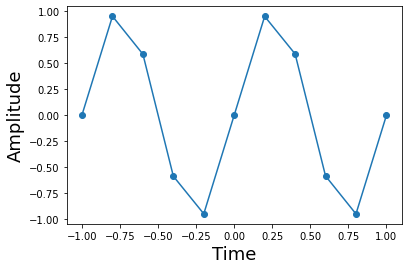

In [3]:
fig,ax = plt.subplots()
pi = 3.14
f = 1.0 # Hz, signal frequency
fs = 5.0 # Hz, sampling rate (ie. >= 2*f)
# sample interval, symmetric for convenience later
t = np.arange(-1, 1+1/fs, 1/fs) 
# sampling interval, asymmetric for convenience later
x = np.sin(2*pi*f*t)
ax.plot(t,x,"o-")
ax.set_xlabel("Time",fontsize=18);
ax.set_ylabel("Amplitude",fontsize=18);

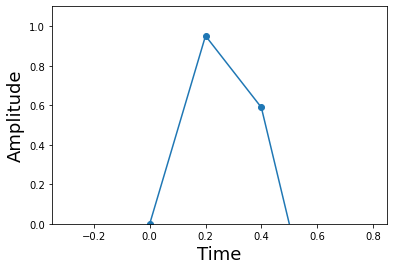

In [44]:
#
# TODO: ZOOM
fig,ax = plt.subplots()
ax.plot(t,x,'o-')
ax.axis(xmin = 1/(4*f)-1/fs*3,
    xmax = 1/(4*f)+1/fs*3,
    ymin = 0,
    ymax = 1.1 )

ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('Amplitude',fontsize=18);

To drive this point home, we can construct the piecewise linear interpolant and
compare the quality of the approximation

In [46]:
"""
list tp has the intervals for the piecewise approximation and the apprx list
contains the corresponding linear approximations for each of those intervals.
"""
interval=[] # piecewise domains
apprx = []  # line on domains
# build up points *evenly* inside of intervals
tp = np.hstack(
   [ 
      np.linspace(t[i],t[i+1],20,endpoint=False)
      for i in range(len(t)-1) 
   ])
# construct arguments for piecewise2
for i in range(len(t)-1):
   # element wise logical operation
   interval.append( np.logical_and(t[i] <= tp,tp < t[i+1]))
   apprx.append( (x[i+1]-x[i])/(t[i+1]-t[i])*(tp[interval[-1]]-t[i]) + x[i])
x_hat = np.piecewise(tp,interval,apprx) # piecewise linear approximation

In [34]:
interval[0].shape

(200,)

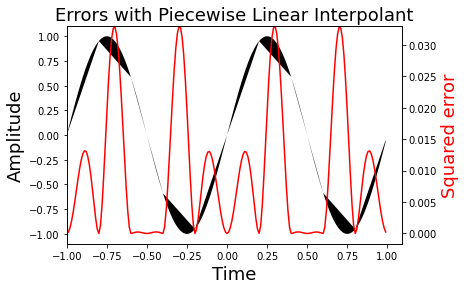

In [47]:
fig,ax1 = plt.subplots()
# fill in the difference between the interpolant and the sine
ax1.fill_between(tp,x_hat,np.sin(2 * pi * f * tp),facecolor='black')
ax1.set_xlabel('Time',fontsize = 18)
ax1.set_ylabel('Amplitude',fontsize = 18)
ax2 = ax1.twinx() # create clone of ax1
sqe = (x_hat - np.sin(2 * pi * f * tp)) ** 2 #compute squared-error
ax2.plot(tp, sqe,'r')
ax2.axis(xmin=-1,ymax= sqe.max())
ax2.set_ylabel('Squared error', color='r',fontsize=18)
ax1.set_title('Errors with Piecewise Linear Interpolant',fontsize=18);

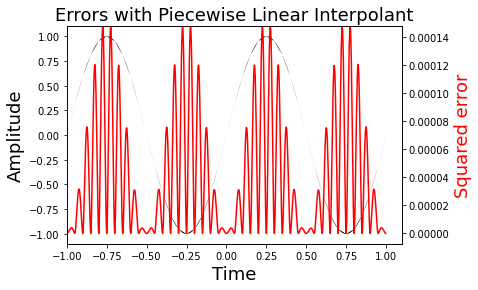

In [48]:
#
# TODO: higher freq i.e more points
fs = 20.0 # Hz, sampling rate (ie. >= 2*f)
# sample interval, symmetric for convenience later
t = np.arange(-1, 1+1/fs, 1/fs)
x = np.sin(2*pi*f*t)
interval=[] # piecewise domains
apprx = []  # line on domains
# build up points *evenly* inside of intervals
tp = np.hstack(
   [ 
      np.linspace(t[i],t[i+1],20,endpoint=False)
      for i in range(len(t)-1) 
   ])
# construct arguments for piecewise2
for i in range(len(t)-1):
   interval.append( np.logical_and(t[i] <= tp,tp < t[i+1]))
   apprx.append( (x[i+1]-x[i])/(t[i+1]-t[i])*(tp[interval[-1]]-t[i]) + x[i])
x_hat = np.piecewise(tp,interval,apprx) # piecewise linear approximation

fig,ax1 = plt.subplots()
# fill in the difference between the interpolant and the sine
ax1.fill_between(tp,x_hat,np.sin(2 * pi * f * tp),facecolor='black')
ax1.set_xlabel('Time',fontsize = 18)
ax1.set_ylabel('Amplitude',fontsize = 18)
ax2 = ax1.twinx() # create clone of ax1
sqe = (x_hat - np.sin(2 * pi * f * tp)) ** 2 #compute squared-error
ax2.plot(tp, sqe,'r')
ax2.axis(xmin=-1,ymax= sqe.max())
ax2.set_ylabel('Squared error', color='r',fontsize=18)
ax1.set_title('Errors with Piecewise Linear Interpolant',fontsize=18);

## Reconstruction

Let's look at this another way by examing the Fourier Transform of a signal that is bandlimited and thus certainly satisfies the hypothesis of the sampling theorem:,

$ X(f) = $ where $ |f|> W $\n,

Now, the inverse Fourier transform of this is the following:\n,

$ x(t) = \int_{-W}^W X(f) e^{j 2 \pi f t} df $,

We can take the $X(f)$ and expand it into a Fourier series by pretending that it is periodic with period $2 W$. Thus, we can formally write the following:\n,

$ X(f) = \sum_k a_k e^{ - j 2 \pi k f/(2 W) }  $,

we can compute the coefficients $a_k$ as,

$ a_k = \frac{1}{2 W} \int_{-W}^W X(f) e^{ j 2 \pi k f/(2 W) } df  $,

These coefficients bear a striking similarity to the $x(t)$ integral we just computed above. In fact, by lining up terms, we can write:\n,

$ a_k = \frac{1}{2 W} x \left(   t = \frac{k}{2 W} \right)  $,

Now, we can write out $X(f)$ in terms of this series and these $a_k$ and then invert the Fourier transform to obtain the following:\n,

$ x(t) = \int_{-W}^W \sum_k a_k e^{ - j 2 \pi k f/(2 W) }  e^{j 2 \pi f t} df $,

substitute for $a_k$,

$ x(t) = \int_{-W}^W \sum_k ( \frac{1}{2 W} x( t = \frac{k}{2 W} ) ) e^{ - j 2 \pi k f/(2 W) }  e^{j 2 \pi f t} df $,

switch summation and integration (usually dangerous, but OK here),

$ x(t) = \sum_k x(t = \frac{k}{2 W}) \frac{1}{2 W}  \int_{-W}^W e^{ - j 2 \pi k f/(2 W) +j 2 \pi f t} df  $,

which gives finally:\n,

$ x(t) = \sum_k x(t = \frac{k}{2 W})  \frac{sin(\pi (k-2 t W))} {\pi (k- 2 t W)} $,

And this what we have been seeking! A formula that reconstructs the function from its samples. Let's try it!

Text(0.5, 1.0, 'Sampling Rate=5.00 Hz')

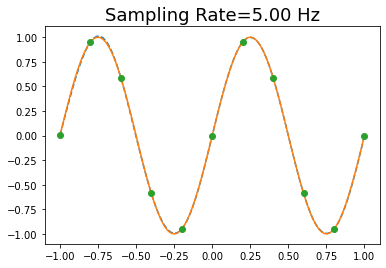

In [52]:
fig,ax=plt.subplots()
t = np.linspace(-1,1,100) # redefine this here for convenience
fs = 5.0
ts = np.arange(-1,1+1/fs,1/fs) # sample points
num_coeffs=len(ts)
sm=0
for k in range(-num_coeffs,num_coeffs):
    # since function is real, need both sides
    sm+=np.sin(2*pi*(k/fs))*np.sinc(k - fs*t)

ax.plot(t,sm,'--',t,np.sin(2*pi*t),ts, np.sin(2*pi*ts),'o')
ax.set_title('Sampling Rate=%3.2f Hz' % fs, fontsize=18 )

Note that the sinc function is defined as the following:

$ sinc(x) =\frac{sinc(\pi x)} {\pi x} $

Because our samples are spaced at $ t = k/fs $ , we’ll use $ W = fs/2$ to line things up

Text(0.5, 1.0, 'Errors with Whittaker Interpolant')

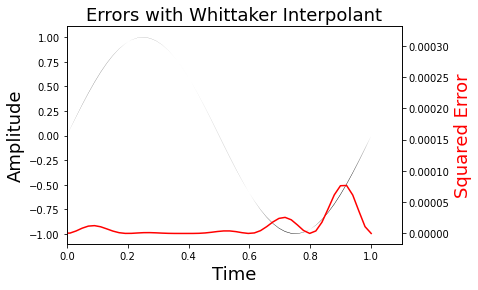

In [61]:
fig,ax1 = plt.subplots()
# TODO: linear interpolation
ax1.fill_between(t,sm, np.sin(2 * pi * f * t),facecolor='black')
ax1.set_ylabel('Amplitude',fontsize = 18)
ax1.set_xlabel('Time',fontsize = 18)

ax2 = ax1.twinx()
sqe = (sm - np.sin(2 * pi * f * t)) ** 2
ax2.plot(t, sqe,'r')
ax2.axis(xmin=0,ymax = sqe.max())
ax2.set_ylabel('Squared Error', color='r',fontsize=18)
#* Whittaker Interpolant or sinc interpolation
ax1.set_title(r'Errors with Whittaker Interpolant',fontsize = 18)


>reduction in squared-error resulting from using the
sinc functions (scale on the right)

**examine these functions more closely**

 three neighboring interpolation functions, one for each of three
neighboring samples. Note that the peaks and zeros of these functions interleave.
Therefore, at each of the sample points, there is no interference from any of the other
functions because the others are all zero there. This is why the interpolated function
matches the sample points exactly. In between sample points, the crown shape of the
function fills in (i.e. interpolates) the missing values as shown in Fig Thus, the
sinc functions provide the missing values, not straight lines as we presumed earlier.
The width of these functions is directly related to the bandwidth of the signal which
is part of the statement of the sampling theorem

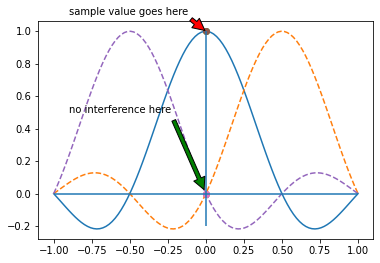

In [68]:
fig,ax = plt.subplots()
k = 0
fs = 2 # makes this plot easier to read
ax.plot(t,np.sinc(k - fs * t),
        t,np.sinc(k + 1 - fs * t),'--',k / fs,1,'o',(k) / fs,0,'o',
        t,np.sinc(k - 1 - fs * t),'--',k / fs,1,'o',(-k) / fs,0,'o')
ax.hlines(0,-1,1) # *horizontal lines
ax.vlines(0,-.2,1) # vertical lines
ax.annotate('sample value goes here',
        xy=(0,1), # arrowhead position
        xytext=(-1 + .1,1.1),# text position
        arrowprops={'facecolor':'red',
                'shrink':0.05},)
ax.annotate('no interference here',
        xy = (0,0),
        xytext = (-1 + .1,0.5),
        arrowprops = {'facecolor':'green',
                'shrink':0.05},); # shrink the arrowhead 

> there is no interference between the functions sitting on each of the interpolating functions because the peak of one is perfectly aligned with the zero of the others (dotted lines)

 following code shows how the individual Whittaker functions (dashed lines) are assembled into the final approximation (black-line) using the given samples (blue-dots)

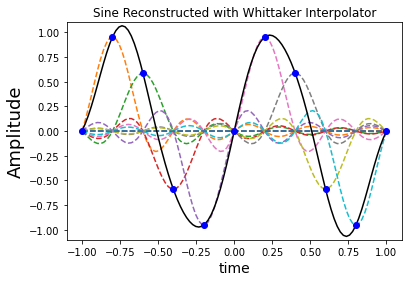

In [74]:
fs=5.0 # sampling rate
k=np.array(sorted(set((t*fs).astype(int)))) # sorted coefficient list
fig,ax = plt.subplots()

ax.plot(t,
        # individual whittaker functions
        (np.sin(2*pi*(k[:,None]/fs))*np.sinc(k[:,None]-fs*t)).T,'--', 
        t,
         # whittaker interpolant
        (np.sin(2*pi*(k[:,None]/fs))*np.sinc(k[:,None]-fs*t)).sum(axis=0),'k-',
     k/fs,np.sin(2*pi*k/fs),'ob')# samples
ax.set_xlabel('time',fontsize=14)
ax.set_ylabel('Amplitude',fontsize = 18)
ax.set_title('Sine Reconstructed with Whittaker Interpolator')
ax.axis((-1.1,1.1,-1.1,1.1));

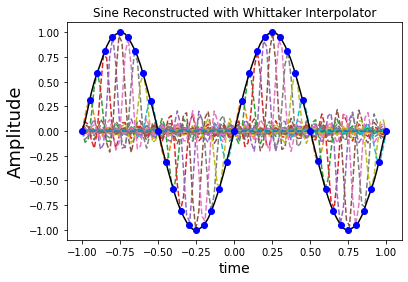

In [75]:
fs=20.0 # sampling rate
k=np.array(sorted(set((t*fs).astype(int)))) # sorted coefficient list
fig,ax = plt.subplots()

ax.plot(t,
        # individual whittaker functions
        (np.sin(2*pi*(k[:,None]/fs))*np.sinc(k[:,None]-fs*t)).T,'--', 
        t,
         # whittaker interpolant
        (np.sin(2*pi*(k[:,None]/fs))*np.sinc(k[:,None]-fs*t)).sum(axis=0),'k-',
     k/fs,np.sin(2*pi*k/fs),'ob')# samples
ax.set_xlabel('time',fontsize=14)
ax.set_ylabel('Amplitude',fontsize = 18)
ax.set_title('Sine Reconstructed with Whittaker Interpolator')
ax.axis((-1.1,1.1,-1.1,1.1));

## 2.3 The Story So Far

get back from digital to analog domain

## 2.4 Approximately Time-Limited-Functions

even though we satisfied the
requirements of the sampling theorem, we still had errors in our approximating
formula

**examining the Whittaker interpolating functions**

the sampling theorem says we only
need a sparse density of samples, but this result says we need to sample forever.

Text(3.1, 0.5, '... and going...')

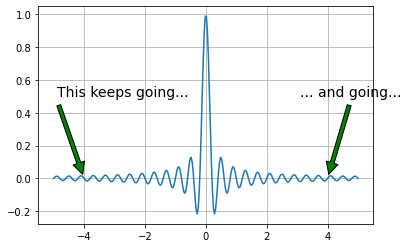

In [4]:
t = np.linspace(-5,5,300) # redefine this here for convenience
fig,ax = plt.subplots()

fs = 5.0 # sampling rate
ax.plot(t,np.sinc(fs * t))
ax.grid() # put grid on axes
ax.annotate('This keeps going...',
    xy=(-4,0),
    xytext=(-5 + .1,0.5),
    arrowprops={'facecolor':'green',
        'shrink':0.05},
    fontsize=14)
ax.annotate('... and going...',
    xy=(4,0),
    xytext=(3 + .1,0.5),
    arrowprops={'facecolor':'green',
        'shrink':0.05},
    fontsize=14)

Let's back off a bit and settle for functions that are *approximately*  time-limited in the sense that almost all of their energy is concentrated in a finite time-window:   ,

$ \int_{-\tau}^\tau |f(t)|^2 dt = E-\epsilon$,


where $E$ is the total energy of the signal:   ,
    
$ \int_{-\infty}^\infty |f(t)|^2 dt = E$   ,
    
Now, with this new definition, we can seek out functions that are band-limited but come very, very (i.e. within $\epsilon$) close to being time-limited as well. In other words, we want functions $\phi(t)$ so that they are band-limited:   ,
    
$ \phi(t) = \int_{-W}^W \Phi(\nu) e^{2 \pi j \nu t} dt $   ,
    
and coincidentally maximize the following:   ,
    
$ \int_{-\tau}^\tau |\phi(t) |^2 dt$   ,
    
After a complicated derivation,  this boils down to solving the following eigenvalue equation:   ,
    
$ \int_{-\tau}^\tau \phi(x)\frac{\sin(2\pi W(t-x))}{\pi(t-x)} dx = \lambda \phi(t)$   ,
    
The set of $\phi_k(t)$ eigenfunctions form the basis for arbitrary   ,
approximately time-limited functions. In other words, we can express   ,
    
$ f(t) = \sum_k a_k \phi_k(t) $   ,
    
Note that   ,
the $\phi_k(t)$ functions are not time-limited, but only time-concentrated in the $[-\tau,\tau]$ interval. With a change of variables, we can write this in normalized form as    ,
    
$ \int_{-1}^1 \psi(x)\frac{\sin(2\pi\sigma(t-x)/4)}{\pi(t-x)} dx = \lambda \psi(t)$   ,
    
where we define $\sigma = (2\tau)(2W)$ as the time-bandwidth product.The advantage of this change of variables is that $\tau$ and $W$ are expressed as a single term. Furthermore, this is the form of a classic problem where the $\psi$ functions turn out to be the angular prolate spheroidal wave functions. Let's see what these $\psi$ functions look like but solving this form of   ,
the eigenvalue problem

In [8]:
# compute max eigenvalue
from scipy.linalg import eigvalsh,eigvals,eigh,eig
from scipy import sign
def max_eig(A):
    """Compute the maximum eigenvalue of a matrix"""
    return np.max(np.linalg.eigvals(A))

A = np.array([[1,2],[3,4]])
print(max_eig(A))

5.372281323269014


he maximum eigenvalue quickly ramps up to almost one.
The largest eigenvalue is the fraction of the energy contained in the interval $[-1, 1]$.
Thus, this means that for $ \sigma >> 3$ , $ \psi_0(t)$  is the eigenfunction that is most concentrated
in that interval.

C:\Users\oeb\AppData\Roaming\Python\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


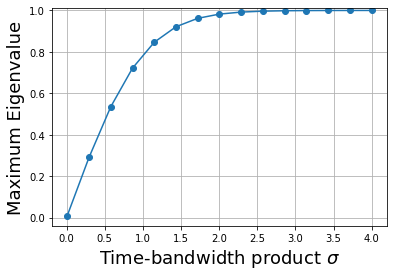

In [6]:
def kernel(x,sigma=1):
    'convenient function to compute kernel of eigenvalue problem'
    x = np.asanyarray(x) # ensure x is array
    y = pi * np.where(x == 0,1.0e-20, x)# avoid divide by zero
    return sin(sigma / 2 * y) / y

nstep = 100 # quick and dirty integral quantization
t = np.linspace(-1,1,nstep) # quantization of time
dt = np.diff(t)[0] # differential step size

def eigv(sigma):
    return np.linalg.eigvals(kernel(t - t[:,None],sigma)).max()
    # (kernel(t - t[:,None],sigma)).max()
    # return np.eigvalsh(kernel(t - t[:,None],sigma)).max() # compute max eigenvalue

sigma = np.linspace(0.01,4,15) # range of time-bandwidth products to consider
fig,ax = plt.subplots()
ax.plot(sigma, dt * np.array([eigv(i) for i in sigma]),'-o')
ax.set_xlabel('Time-bandwidth product $\sigma$',fontsize = 18)
ax.set_ylabel('Maximum Eigenvalue',fontsize=18)
ax.axis(ymax=1.01)
ax.grid()

let’s look at this eigenfunction under those conditions shown
in Figure

In [11]:
(np.arange(0, 10)[:,None]).shape

(10, 1)

In [7]:
sigma=3
w,v = eigh(kernel(t-t[:,None],sigma))
maxv=v[:, w.argmax()]

fig,ax=plt.subplots()
ax.plot(t,maxv)
ax.set_xlabel('time',fontsize=18)
ax.set_ylabel('$\psi_0(t)$',fontsize=22)
ax.set_title('Eigenvector corresponding to e-value=%3.4f;$\sigma$=%3.2f'%(w.max()*dt,sigma))

Note that we'll see this shape again when we take up window functions.,

What does this all mean? By framing our problem this way, we made a connection between the quality of our reconstruction via the Whittaker interpolant and the time-bandwidth product. Up until now, we did not have a concrete way of relating limitations in time to limitations in frequency. Now that we know how to use the time-bandwidth product, let's go back to the original formulation with the separate  $\tau$ and $W$ terms as in the following:,

$ \int_{-\tau}^\tau \phi(x)\frac{\sin(2\pi W (t-x))}{\pi(t-x)} dx = \lambda \phi(t)$\n,

and then re-solve the eigenvalue problem.

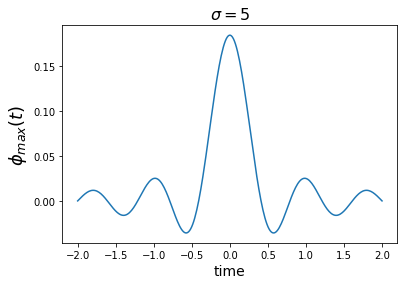

In [9]:

def kernel_tau(x,W=1):
    'convenient function to compute kernel of eigenvalue problem'
    x = np.asanyarray(x)
    y = pi* np.where(x == 0,1.0e-20, x)
    return sin(2*W*y)/y

nstep=300                # quick and dirty integral quantization
t = np.linspace(-1,1,nstep) # quantization of time
tt = np.linspace(-2,2,nstep)# extend interval

sigma = 5
W = sigma/2./2./t.max()

w,v=eig(kernel_tau(t-tt[:,None],W))
ii = np.argsort(w.real) 
maxv=v[:, w.real.argmax()].real
fig,ax = plt.subplots()
# scipy.sign is deprecated and will be removed in
#  SciPy 2.0.0, use numpy.sign instead
z = np.sign(maxv[int(nstep//2)])
z = maxv/z
ax.plot(tt,z) # normalize to keep orientation upwards
ax.set_xlabel('time',fontsize=14)
ax.set_ylabel(r'$\phi_{max}(t)$',fontsize=18)
ax.set_title('$\sigma=%d$'%(2*W*2*t.max()),fontsize=16);

This looks suspicously like the, $sinc$ function. In fact, in the limit as $\sigma \rightarrow \infty$, the  eigenfunctions devolve into time-shifted versions of the $ sinc $ function. These are the same functions used in the Whittaker interpolant. Now we have a way to justify the interpolant by appealing to large $\sigma$ values.

## Summary

We started by investigating the residual error in the reconstruction formula using
the Whittaker approximation functions. Then, we recognized that we cannot have
signals that are simultaneously time-limited and band-limited. This realization
drove us to investigate approximately time-limited functions. Through carefully
examining the resulting eigenvalue problem, we determined the time-bandwidth
conditions under which the Whittaker interopolant is asymptotically valid. As you
can imagine, there is much more to this story, and many powerful theorems place
bounds on the quality and dimensionality of this reconstruction, but for us, the
qualifying concept of time-bandwidth product is enough for now